In [45]:
#STEPS of preprocessing of data
# step:1]- Import necessary library
# step:2]- Read Dataset
# step: 3]- sanity check of data
# step:4]- Exploratory Data Analysis (EDA)
# step:5] -Missing Value treatments
# step:6]- Outliers treatments
# step:7]- duplicates & garbage value treatments
# step: 8]- Normalization
# step:9]- Encoding of data

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [47]:
d1=pd.read_csv('datasets/sample_dataset.csv')
sd=d1.copy()
# sd['season'].mean()
sd.head()

,Unnamed: 0,season,match_id,home_team,away_team,current_innings,over,ball,wkt_batsman_runs,isRetiredHurt,cumulative_runs,wickets_lost,overs_bowled,run_rate,powerplay
0,0,2023.0,1359475,GT,CSK,CSK,1,1,0.0,False,0.0,0,1.166667,0.0,True
1,1,2023.0,1359475,GT,CSK,CSK,1,2,0.0,False,0.0,0,1.333333,0.0,True
2,2,2023.0,1359475,GT,CSK,CSK,1,3,0.0,False,0.0,0,1.500000,0.0,True
3,3,2023.0,1359475,GT,CSK,CSK,1,4,0.0,False,0.0,0,1.666667,0.0,True
4,4,2023.0,1359475,GT,CSK,CSK,1,5,0.0,False,0.0,0,1.833333,0.0,True


In [48]:
sd.columns

Index(['Unnamed: 0', 'season', 'match_id', 'home_team', 'away_team',
       'current_innings', 'over', 'ball', 'wkt_batsman_runs', 'isRetiredHurt',
       'cumulative_runs', 'wickets_lost', 'overs_bowled', 'run_rate',
       'powerplay'],
      dtype='object')

# Sanity Check

In [49]:
#shape
sd.shape

(242550, 15)

In [50]:
#info
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242550 entries, 0 to 242549
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        242550 non-null  int64  
 1   season            242067 non-null  float64
 2   match_id          242550 non-null  int64  
 3   home_team         242550 non-null  object 
 4   away_team         242550 non-null  object 
 5   current_innings   242550 non-null  object 
 6   over              242550 non-null  int64  
 7   ball              242550 non-null  int64  
 8   wkt_batsman_runs  242550 non-null  float64
 9   isRetiredHurt     242550 non-null  bool   
 10  cumulative_runs   242550 non-null  float64
 11  wickets_lost      242550 non-null  int64  
 12  overs_bowled      242550 non-null  float64
 13  run_rate          242550 non-null  float64
 14  powerplay         242550 non-null  bool   
dtypes: bool(2), float64(5), int64(5), object(3)
memory usage: 24.5+ MB


In [51]:
#finding any missing value
sd.isnull().sum()
# sd.isnull().sum()/sd.shape[0]*100  => Percentage

Unnamed: 0            0
season              483
match_id              0
home_team             0
away_team             0
current_innings       0
over                  0
ball                  0
wkt_batsman_runs      0
isRetiredHurt         0
cumulative_runs       0
wickets_lost          0
overs_bowled          0
run_rate              0
powerplay             0
dtype: int64

In [52]:
#finding duplicates
sd.duplicated().sum()

0

In [53]:
#identify garbage values
for i in sd.select_dtypes(include="object").columns:
    print(sd[i].value_counts())
    print("+++"*10)

home_team
CSK      29624
SRH      29061
DC       28900
RCB      28478
MI       28333
KKR      26725
RR       22804
KXIP     21994
PWI       5478
PBKS      4817
GT        4369
LSG       3598
GL        3526
RPS       3284
Kochi     1559
Name: count, dtype: int64
++++++++++++++++++++++++++++++
away_team
MI       30851
KKR      28963
SRH      28553
RCB      27839
DC       27174
RR       25902
CSK      23771
KXIP     22922
PWI       5399
PBKS      5224
RPS       3722
GT        3572
GL        3562
LSG       3470
Kochi     1626
Name: count, dtype: int64
++++++++++++++++++++++++++++++
current_innings
DC       37007
MI       29572
RCB      28087
KKR      27772
CSK      26810
RR       24306
KXIP     22545
SRH      19833
PWI       5432
PBKS      5084
GT        3997
GL        3550
LSG       3510
RPS       3473
Kochi     1572
Name: count, dtype: int64
++++++++++++++++++++++++++++++


# EDA

In [54]:
#descriptive stats
sd.describe()

,Unnamed: 0,season,match_id,over,ball,wkt_batsman_runs,cumulative_runs,wickets_lost,overs_bowled,run_rate
count,242550.000000,242067.000000,2.425500e+05,242550.000000,242550.000000,242550.000000,242550.000000,242550.000000,242550.000000,242550.000000
mean,121274.500000,2015.588048,8.701769e+05,10.161678,3.483875,0.921571,37.952257,2.164465,10.742324,2.754477
std,70018.298233,4.639506,3.530671e+05,5.658053,1.707451,5.932493,40.754669,1.949695,5.661658,3.092077
min,0.000000,2008.000000,3.359820e+05,1.000000,1.000000,0.000000,0.000000,0.000000,1.166667,0.000000
25%,60637.250000,2012.000000,5.483150e+05,5.000000,2.000000,0.000000,1.000000,1.000000,5.833333,0.250000
50%,121274.500000,2015.000000,8.298190e+05,10.000000,3.000000,0.000000,25.000000,2.000000,10.666667,2.463158
75%,181911.750000,2020.000000,1.216506e+06,15.000000,5.000000,0.000000,61.000000,3.000000,15.500000,4.327869
max,242549.000000,2023.000000,1.370353e+06,20.000000,7.000000,129.000000,343.000000,14.000000,21.000000,147.428571


In [55]:
sd.describe(include="object")

,home_team,away_team,current_innings
count,242550,242550,242550
unique,15,15,15
top,CSK,MI,DC
freq,29624,30851,37007


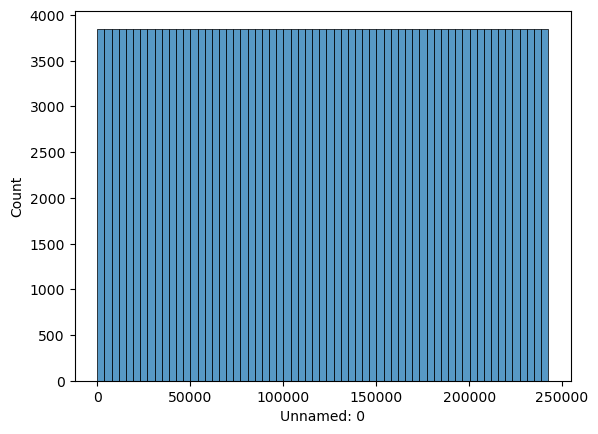

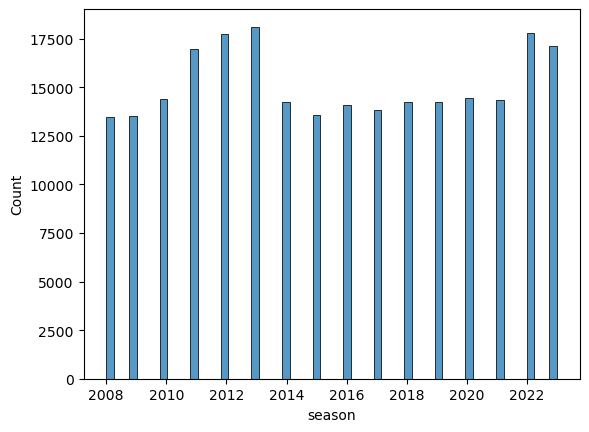

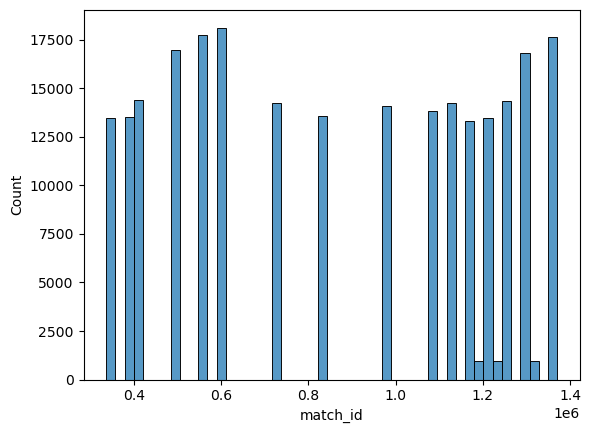

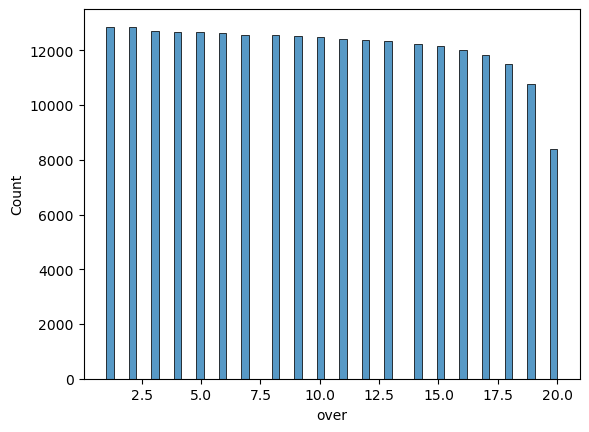

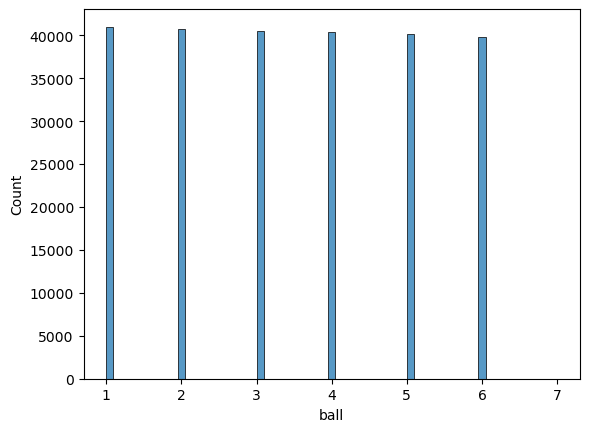

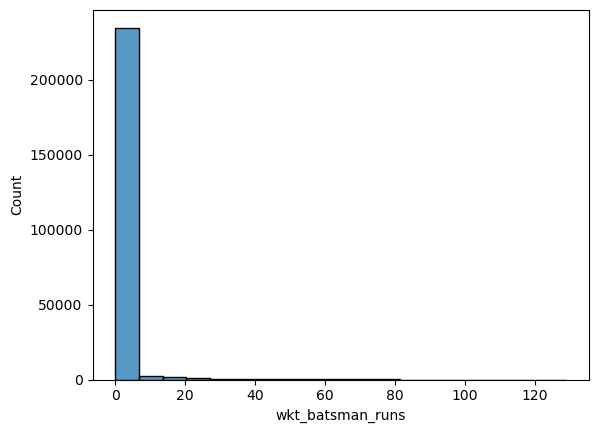

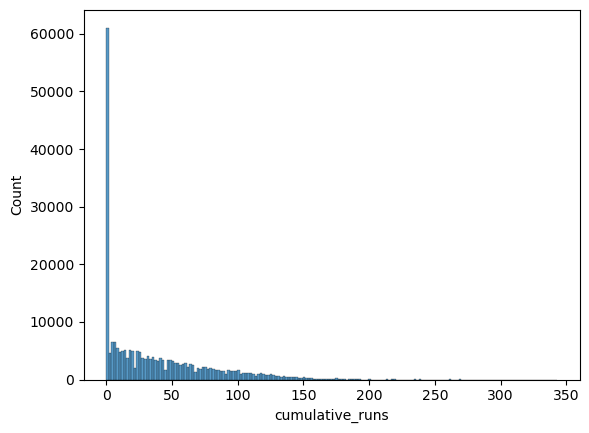

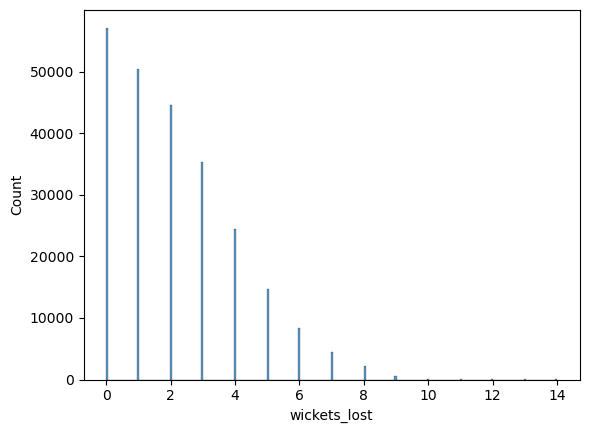

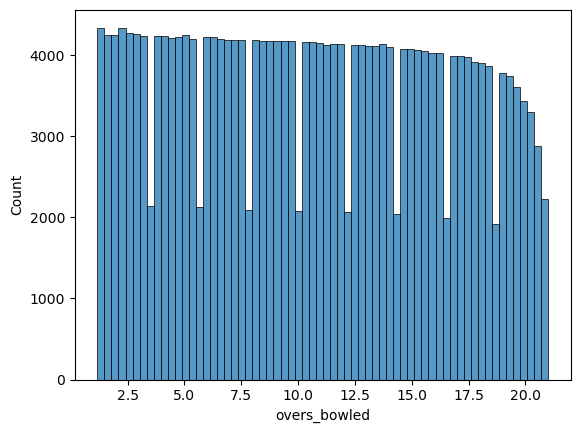

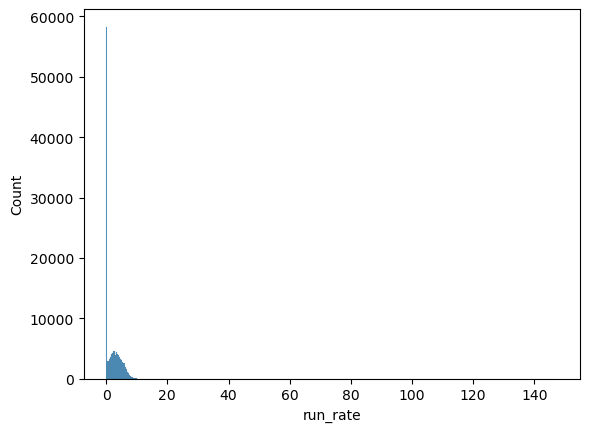

In [56]:
#distribution histogram
for i in sd.select_dtypes(include="number").columns:
    sns.histplot(data=sd,x=i)
    plt.show()

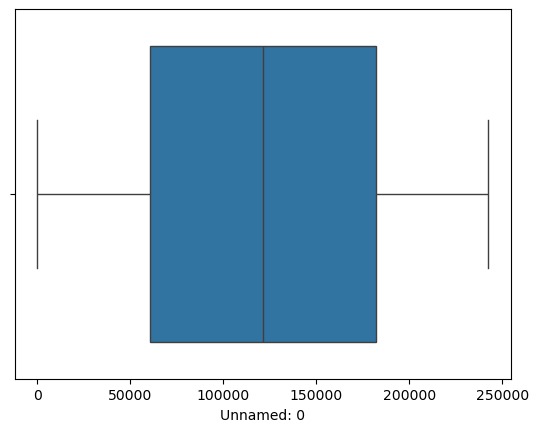

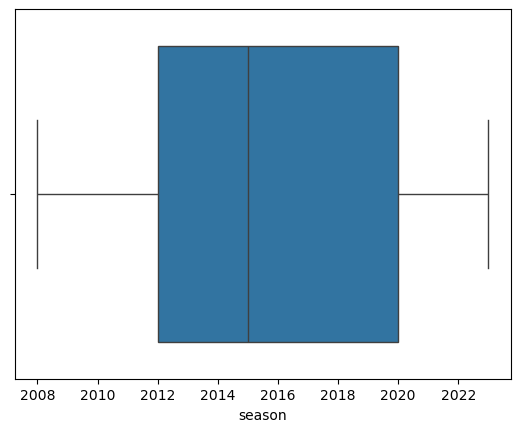

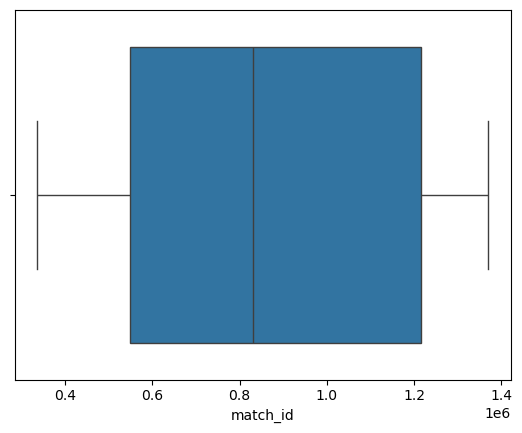

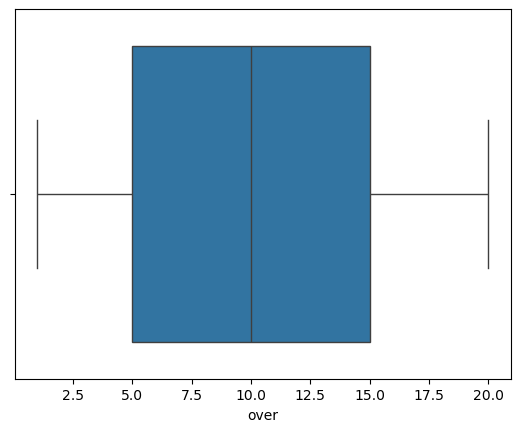

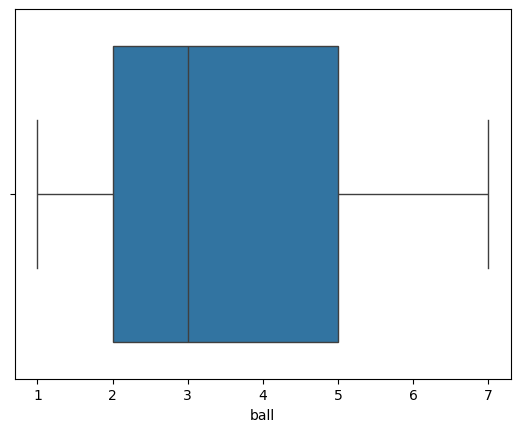

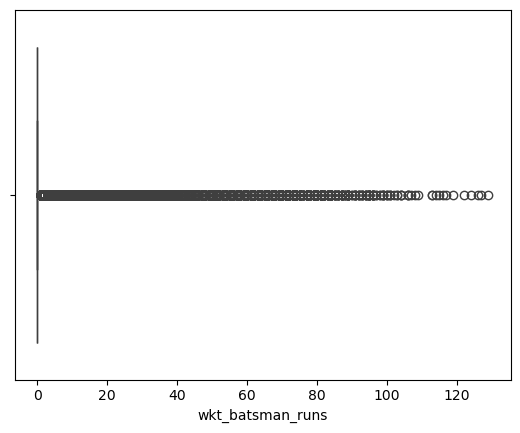

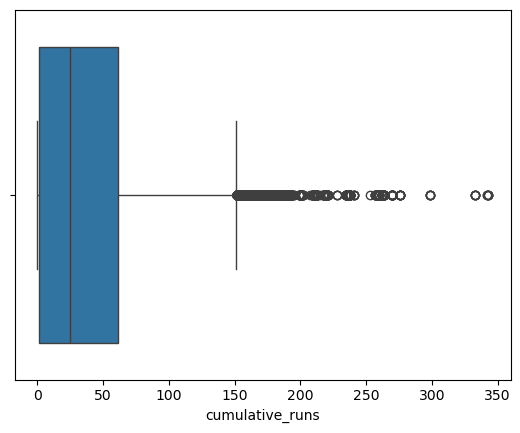

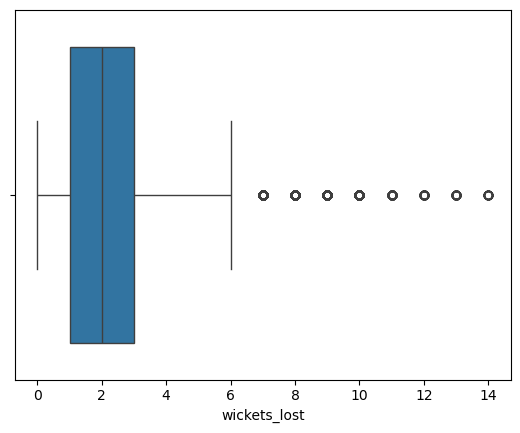

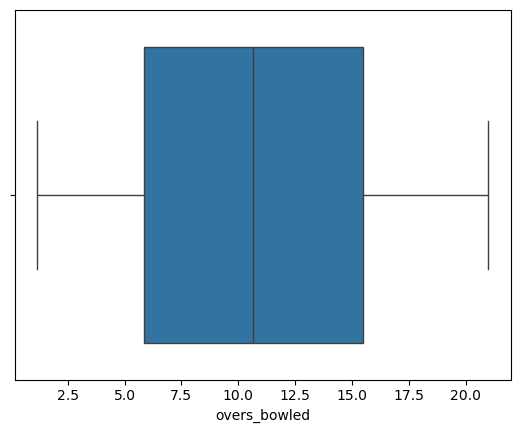

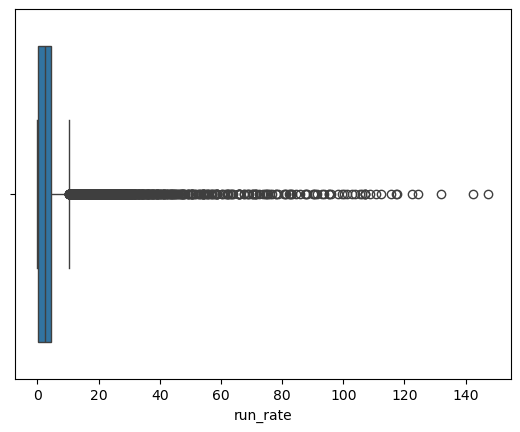

In [57]:
#box plot to find outliers
for i in sd.select_dtypes(include="number").columns:
    sns.boxplot(data=sd,x=i)
    plt.show()

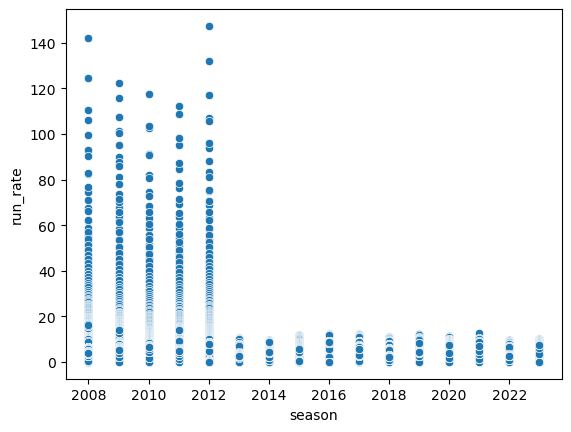

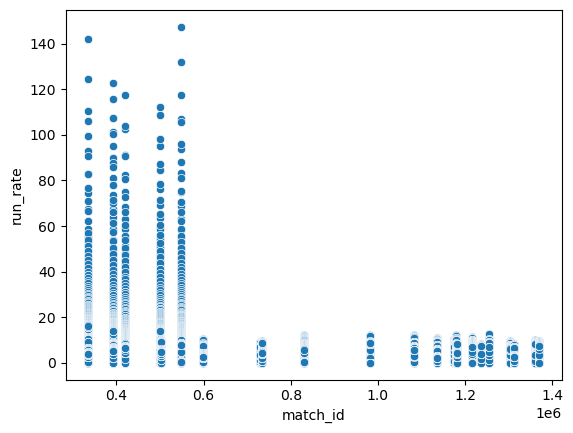

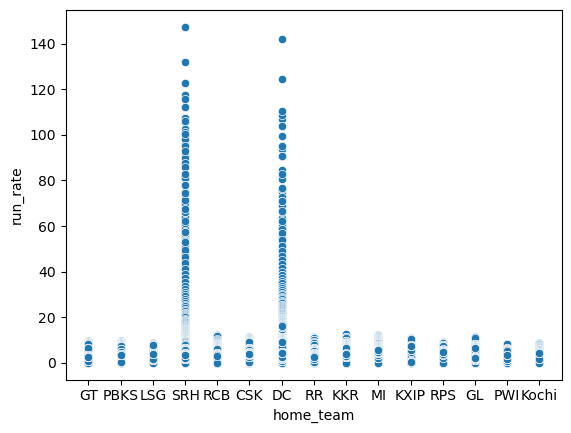

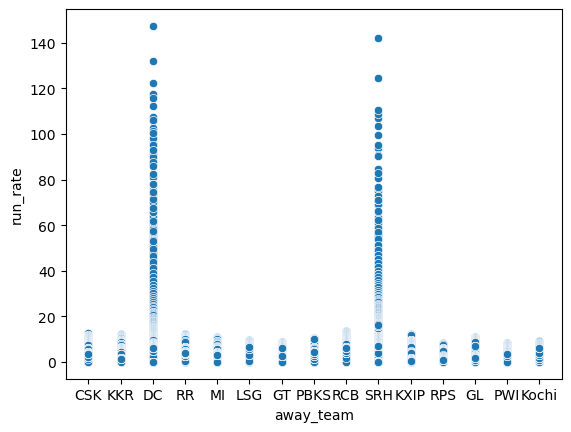

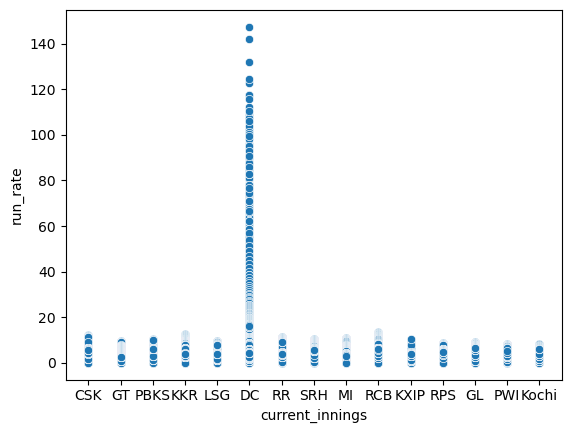

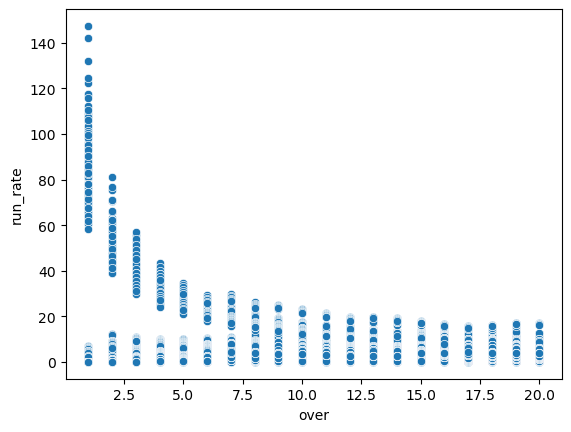

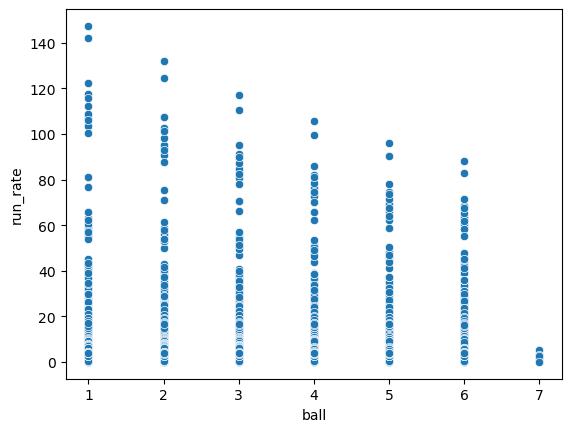

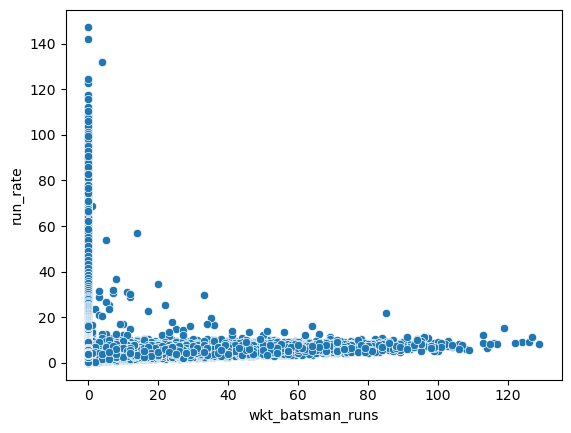

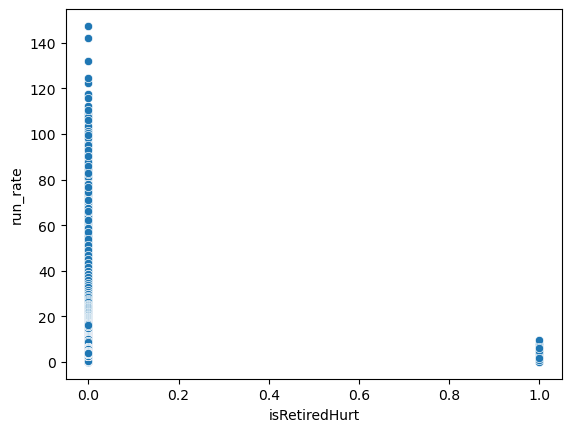

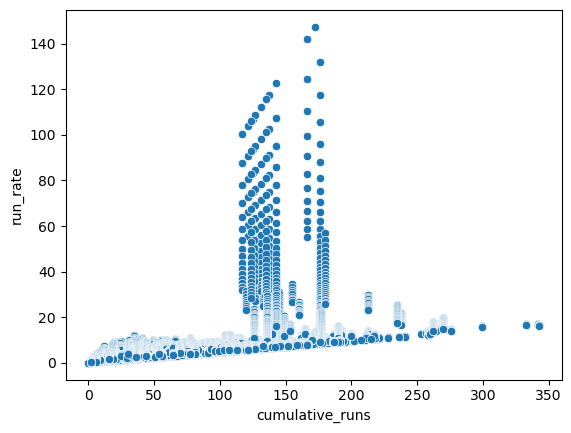

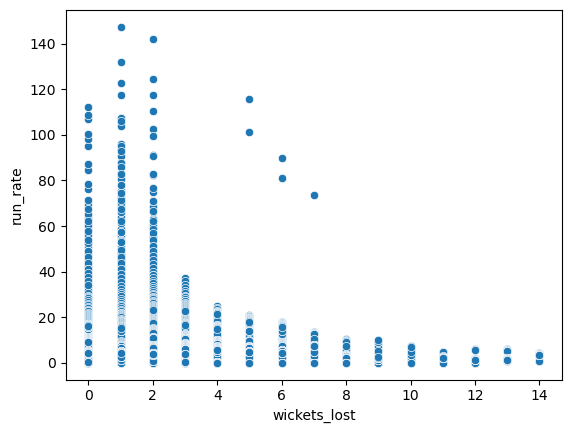

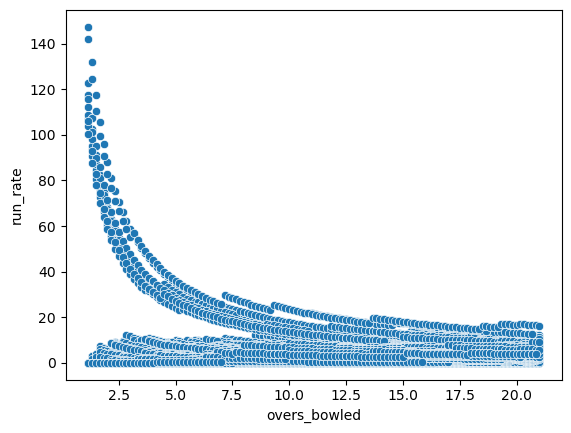

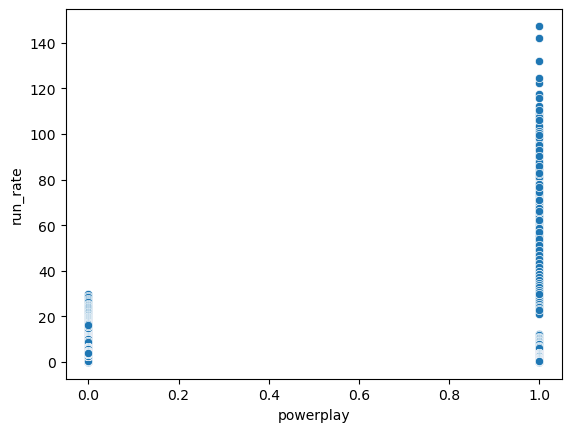

In [58]:
# scatter plots relationships between data 
for i in ['season', 'match_id', 'home_team', 'away_team',
       'current_innings', 'over', 'ball', 'wkt_batsman_runs', 'isRetiredHurt',
       'cumulative_runs', 'wickets_lost', 'overs_bowled',
       'powerplay']:
    sns.scatterplot(data=sd,x=i,y="run_rate")
    plt.show()


In [59]:
#correlation with heatmap to intrepret the relation and multi collinearity
s=sd.select_dtypes(include="number").corr()

<Axes: >

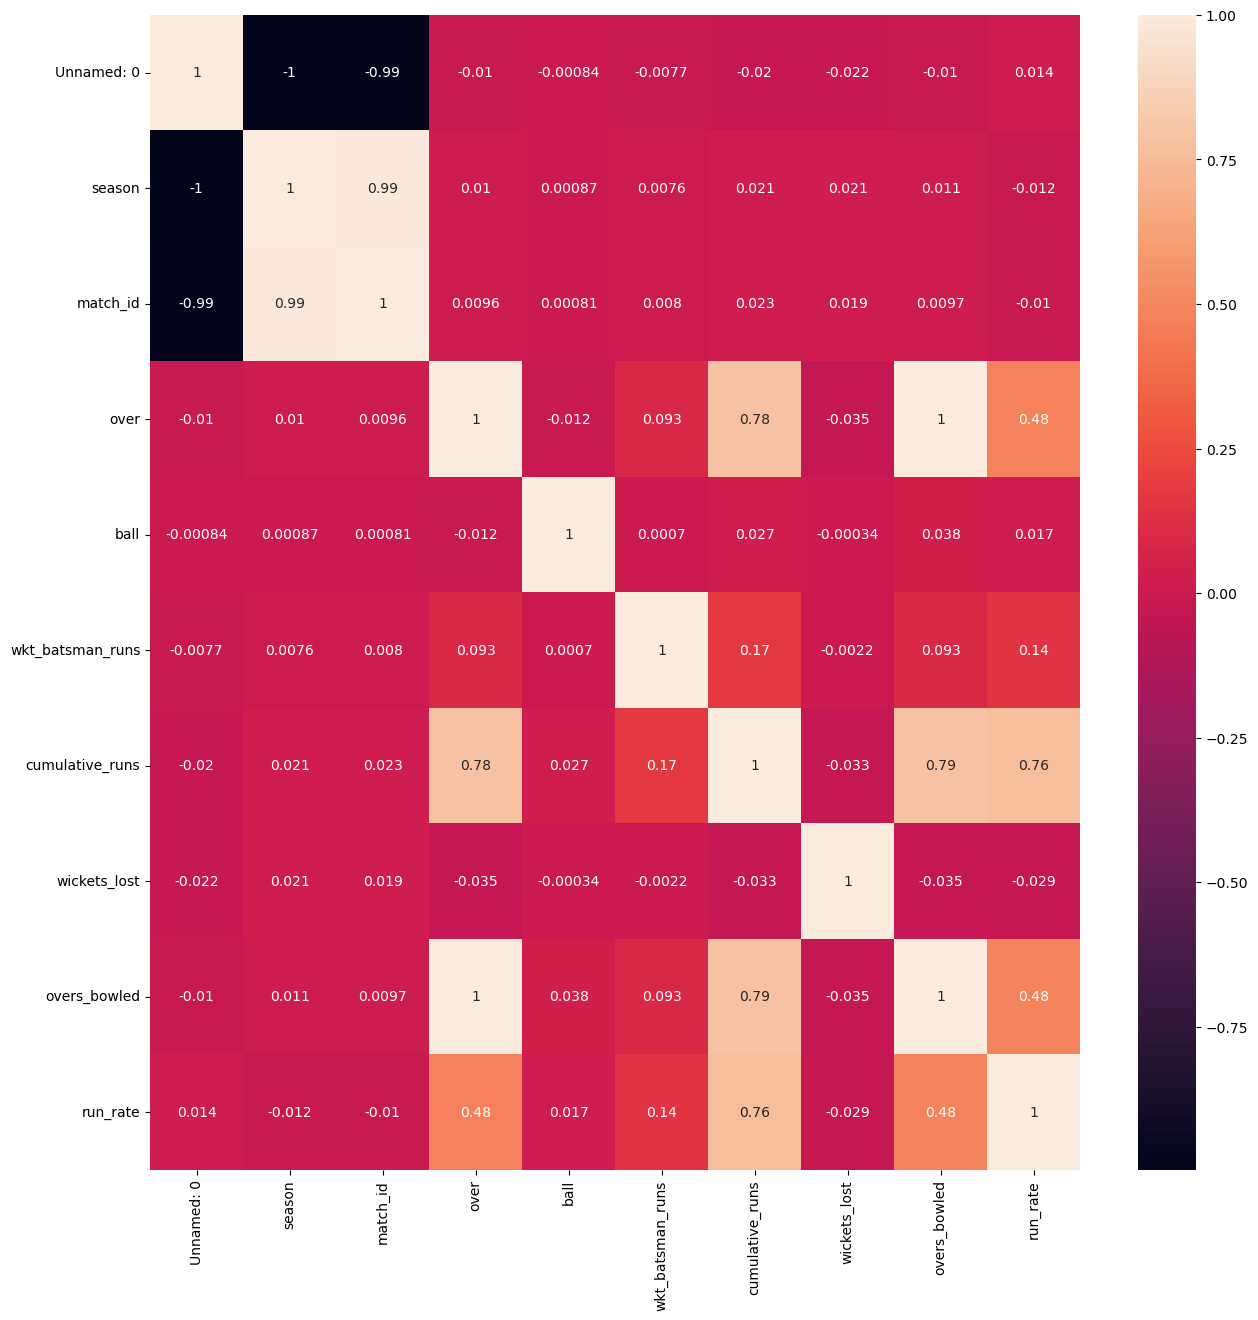

In [60]:
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)

# Missing Value treatments

In [61]:
#before removing 
sd.isnull().sum()

Unnamed: 0            0
season              483
match_id              0
home_team             0
away_team             0
current_innings       0
over                  0
ball                  0
wkt_batsman_runs      0
isRetiredHurt         0
cumulative_runs       0
wickets_lost          0
overs_bowled          0
run_rate              0
powerplay             0
dtype: int64

In [62]:
# choose the method of imputing missing value 
# like mean, median, mode or KNNInputer


# for i in ["season"]:
#     sd[i].fillna(sd[i].mode()[0], inplace=True)

In [63]:
from sklearn.impute import KNNImputer
impute=KNNImputer()

In [64]:
for i in sd.select_dtypes(include="number").columns:
    sd[i]=impute.fit_transform(sd[[i]])

In [65]:
sd.isnull().sum()

Unnamed: 0          0
season              0
match_id            0
home_team           0
away_team           0
current_innings     0
over                0
ball                0
wkt_batsman_runs    0
isRetiredHurt       0
cumulative_runs     0
wickets_lost        0
overs_bowled        0
run_rate            0
powerplay           0
dtype: int64

# Duplicates & garbage value treatments

In [66]:
sd.drop_duplicates()

,Unnamed: 0,season,match_id,home_team,away_team,current_innings,over,ball,wkt_batsman_runs,isRetiredHurt,cumulative_runs,wickets_lost,overs_bowled,run_rate,powerplay
0,0.0,2023.0,1359475.0,GT,CSK,CSK,1.0,1.0,0.0,False,0.0,0.0,1.166667,0.000000,True
1,1.0,2023.0,1359475.0,GT,CSK,CSK,1.0,2.0,0.0,False,0.0,0.0,1.333333,0.000000,True
2,2.0,2023.0,1359475.0,GT,CSK,CSK,1.0,3.0,0.0,False,0.0,0.0,1.500000,0.000000,True
3,3.0,2023.0,1359475.0,GT,CSK,CSK,1.0,4.0,0.0,False,0.0,0.0,1.666667,0.000000,True
4,4.0,2023.0,1359475.0,GT,CSK,CSK,1.0,5.0,0.0,False,0.0,0.0,1.833333,0.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242545,242545.0,2008.0,336040.0,CSK,RR,RR,20.0,2.0,0.0,False,77.0,2.0,20.333333,3.786885,False
242546,242546.0,2008.0,336040.0,CSK,RR,RR,20.0,3.0,0.0,False,77.0,3.0,20.500000,3.756098,False
242547,242547.0,2008.0,336040.0,CSK,RR,RR,20.0,4.0,0.0,False,77.0,3.0,20.666667,3.725806,False
242548,242548.0,2008.0,336040.0,CSK,RR,RR,20.0,4.0,0.0,False,77.0,3.0,20.666667,3.725806,False


# Encoding

In [67]:
#label and onehot encoding  and get_dummies

In [68]:
dummy=pd.get_dummies(data=sd,columns=["home_team","away_team","current_innings"],drop_first=True)

In [69]:
dummy

,Unnamed: 0,season,match_id,over,ball,wkt_batsman_runs,isRetiredHurt,cumulative_runs,wickets_lost,overs_bowled,...,current_innings_KXIP,current_innings_Kochi,current_innings_LSG,current_innings_MI,current_innings_PBKS,current_innings_PWI,current_innings_RCB,current_innings_RPS,current_innings_RR,current_innings_SRH
0,0.0,2023.0,1359475.0,1.0,1.0,0.0,False,0.0,0.0,1.166667,...,False,False,False,False,False,False,False,False,False,False
1,1.0,2023.0,1359475.0,1.0,2.0,0.0,False,0.0,0.0,1.333333,...,False,False,False,False,False,False,False,False,False,False
2,2.0,2023.0,1359475.0,1.0,3.0,0.0,False,0.0,0.0,1.500000,...,False,False,False,False,False,False,False,False,False,False
3,3.0,2023.0,1359475.0,1.0,4.0,0.0,False,0.0,0.0,1.666667,...,False,False,False,False,False,False,False,False,False,False
4,4.0,2023.0,1359475.0,1.0,5.0,0.0,False,0.0,0.0,1.833333,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242545,242545.0,2008.0,336040.0,20.0,2.0,0.0,False,77.0,2.0,20.333333,...,False,False,False,False,False,False,False,False,True,False
242546,242546.0,2008.0,336040.0,20.0,3.0,0.0,False,77.0,3.0,20.500000,...,False,False,False,False,False,False,False,False,True,False
242547,242547.0,2008.0,336040.0,20.0,4.0,0.0,False,77.0,3.0,20.666667,...,False,False,False,False,False,False,False,False,True,False
242548,242548.0,2008.0,336040.0,20.0,4.0,0.0,False,77.0,3.0,20.666667,...,False,False,False,False,False,False,False,False,True,False


In [70]:
ohe = OneHotEncoder(handle_unknown="ignore",sparse_output=False).set_output(transform='pandas')

In [71]:
ohetransform=ohe.fit_transform(sd[["home_team","away_team","current_innings"]])

In [72]:
ohetransform

,home_team_CSK,home_team_DC,home_team_GL,home_team_GT,home_team_KKR,home_team_KXIP,home_team_Kochi,home_team_LSG,home_team_MI,home_team_PBKS,...,current_innings_KXIP,current_innings_Kochi,current_innings_LSG,current_innings_MI,current_innings_PBKS,current_innings_PWI,current_innings_RCB,current_innings_RPS,current_innings_RR,current_innings_SRH
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242545,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
242546,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
242547,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
242548,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [73]:
pp=pd.concat([sd,ohetransform],axis=1).drop(columns=["home_team","away_team","current_innings"])

In [74]:
pp.head()

,Unnamed: 0,season,match_id,over,ball,wkt_batsman_runs,isRetiredHurt,cumulative_runs,wickets_lost,overs_bowled,...,current_innings_KXIP,current_innings_Kochi,current_innings_LSG,current_innings_MI,current_innings_PBKS,current_innings_PWI,current_innings_RCB,current_innings_RPS,current_innings_RR,current_innings_SRH
0,0.0,2023.0,1359475.0,1.0,1.0,0.0,False,0.0,0.0,1.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2023.0,1359475.0,1.0,2.0,0.0,False,0.0,0.0,1.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,2023.0,1359475.0,1.0,3.0,0.0,False,0.0,0.0,1.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,2023.0,1359475.0,1.0,4.0,0.0,False,0.0,0.0,1.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,2023.0,1359475.0,1.0,5.0,0.0,False,0.0,0.0,1.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
label=LabelEncoder()

In [76]:
lsd=sd.copy()
lsd

,Unnamed: 0,season,match_id,home_team,away_team,current_innings,over,ball,wkt_batsman_runs,isRetiredHurt,cumulative_runs,wickets_lost,overs_bowled,run_rate,powerplay
0,0.0,2023.0,1359475.0,GT,CSK,CSK,1.0,1.0,0.0,False,0.0,0.0,1.166667,0.000000,True
1,1.0,2023.0,1359475.0,GT,CSK,CSK,1.0,2.0,0.0,False,0.0,0.0,1.333333,0.000000,True
2,2.0,2023.0,1359475.0,GT,CSK,CSK,1.0,3.0,0.0,False,0.0,0.0,1.500000,0.000000,True
3,3.0,2023.0,1359475.0,GT,CSK,CSK,1.0,4.0,0.0,False,0.0,0.0,1.666667,0.000000,True
4,4.0,2023.0,1359475.0,GT,CSK,CSK,1.0,5.0,0.0,False,0.0,0.0,1.833333,0.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242545,242545.0,2008.0,336040.0,CSK,RR,RR,20.0,2.0,0.0,False,77.0,2.0,20.333333,3.786885,False
242546,242546.0,2008.0,336040.0,CSK,RR,RR,20.0,3.0,0.0,False,77.0,3.0,20.500000,3.756098,False
242547,242547.0,2008.0,336040.0,CSK,RR,RR,20.0,4.0,0.0,False,77.0,3.0,20.666667,3.725806,False
242548,242548.0,2008.0,336040.0,CSK,RR,RR,20.0,4.0,0.0,False,77.0,3.0,20.666667,3.725806,False


In [77]:
lsd["home_team"].unique()

array(['GT', 'PBKS', 'LSG', 'SRH', 'RCB', 'CSK', 'DC', 'RR', 'KKR', 'MI',
       'KXIP', 'RPS', 'GL', 'PWI', 'Kochi'], dtype=object)

In [78]:
lsd["home_team"]=label.fit_transform(lsd["home_team"])

In [79]:
lsd.dtypes

Unnamed: 0          float64
season              float64
match_id            float64
home_team             int32
away_team            object
current_innings      object
over                float64
ball                float64
wkt_batsman_runs    float64
isRetiredHurt          bool
cumulative_runs     float64
wickets_lost        float64
overs_bowled        float64
run_rate            float64
powerplay              bool
dtype: object

In [80]:
lsd["home_team"].unique()

array([ 3,  9,  7, 14, 11,  0,  1, 13,  4,  8,  5, 12,  2, 10,  6])